# Analiza podstrani(subredditov) r/news in r/worldnews spletne strani Reddit

Reddit je ameriška zabavna, družbena in novičarska spletna stran.
Na Reddit uporabniki objavljajo razne povezave (večinoma na druge spletne strani), ki jih lahko drugi uporabniki ocenijo pozitivno (upvote) ali negativno (downvote) in komentirajo. Razdeljena je na več podstrani-subredditov.

Podstrani r/news in r/worldnews sta privzeti. Objave privzetih strani se pokažejo neregistriranim in novim uporabnikom na naslovnici(front page), ker se večina uporabnikov od podstrani ne odjavi, le prijavi, imajo tako privzete strani avtomatsko največ uporabnikov.

Primerjala sem novice dveh takih večjih podstrani r/news-novice in r/worldnews-svetovne novice. Podstrani so razdeljene na več delov, analizirala sem top-najboljše in contraversial-kontraverzno.

## Hipoteze
    - 1. r/news bo imel več ameriških virov novic kot r/worldnews.
    - 2. Viri r/worldnews bodo kvalitetnejše od virov r/news. (The Guardian > FoxNews ) 
    - 3. Novice iz predela kontraverzno bodo iz tabloidov, rumenega tiska ali z zavajujočo vsebino.
## Primerjave
    - Primerjava povprečnih ocen in komentarjev vseh kategorji
    - Primerjava povprečnih ocen in komentarjev najpogostejših virov
    - Pregled 5 najbolj komentiranih in  najbolje ocenjenih novic posameznih kategorij

In [1]:
import pandas as pd
%matplotlib inline
pd.set_option('max_colwidth',400)

In [2]:
news_con=pd.read_csv('news_con.csv')
news_top=pd.read_csv('news_top.csv')
wnews_con=pd.read_csv('wnews_con.csv')
wnews_top=pd.read_csv('wnews_top.csv')

In [3]:
news_con_viri=news_con.groupby(['Vir'],as_index=False)
news_top_viri=news_top.groupby(['Vir'],as_index=False)
wnews_con_viri=wnews_con.groupby(['Vir'],as_index=False)
wnews_top_viri=wnews_top.groupby(['Vir'],as_index=False)

In [4]:
viri_kontraverzno=pd.merge(news_con_viri.count()[['Vir','Naslov']],wnews_con_viri.count()[['Vir','Naslov']],on='Vir', suffixes=('_news', '_wnews'))

### Hipoteza 1: r/news bo imel več ameriških virov novic kot r/worldnews
Že v samem opisu podstrani r/worldnews je zapisano, da stran dovoljuje povezave na vse novice, razen notranjih zadev in politike ZDA. Tako še s preštetjem pojavitve virov potrdimo, da hipoteza drži.

Združila sem skupaj število novic posameznega vira r/news in r/worldnews. Tako sem dobila vpogled v seznam najpogostejših virov na posamezni strani.

In [5]:
viri_news=pd.merge(news_con_viri.count()[['Vir','Naslov']],news_top_viri.count()[['Vir','Naslov']],on='Vir')
viri_wnews=pd.merge(wnews_con_viri.count()[['Vir','Naslov']],wnews_top_viri.count()[['Vir','Naslov']],on='Vir')
viri_news['skupni_naslovi'] = viri_news.Naslov_x + viri_news.Naslov_y
viri_wnews['skupni_naslovi']=viri_wnews.Naslov_x + viri_wnews.Naslov_y

In [6]:
viri_news[['Vir','skupni_naslovi']].sort_values(by='skupni_naslovi',ascending=False).head(n=10)

,Vir,skupni_naslovi
71,washingtonpost.com,58
66,theguardian.com,48
24,foxnews.com,25
56,nytimes.com,23
49,news.yahoo.com,22
45,nbcnews.com,21
1,abcnews.go.com,19
13,cnn.com,19
31,independent.co.uk,19
70,usatoday.com,17


In [7]:
viri_wnews[['Vir','skupni_naslovi']].sort_values(by='skupni_naslovi',ascending=False).head(n=10)

,Vir,skupni_naslovi
58,theguardian.com,64
51,rt.com,54
3,bbc.co.uk,36
13,dailymail.co.uk,31
34,independent.co.uk,30
4,bbc.com,29
45,nytimes.com,24
50,reuters.com,21
53,self.worldnews,16
74,washingtonpost.com,15


Komentar: 
(Analiziram samo 10 najpogostejših virov)
V razdelku r/news se pojavi samo 2 neameriška vira (theguardian.com in independent.co.uk).
V razdelku r/worldnews sta tudi samo 2 ameriška vira(nytimes.com, washingtonpost.com) uvrstila med 10 najpogostejših.

Predvidevem lahko, da so bralci in naročniki r/news večinoma prebivalci ZDA, ki jih seveda zanimajo novice povezane z ZDA, bralci r/worldnews pa so ostali obiskovalci Reddita.

Moja hipoteza je potrjena. V r/news je 8 ameriških virov, v r/wnews pa le 2.

###  Hipoteza 2:Viri r/worldnews bodo kvalitetnejše od virov r/news.


S pomočjo prejšnih tabel ugotovimo, da se med najpogostejšimi viri r/news izstopa samo foxnews.com, za katerega bi lahko trdili, da ne poroča najbolj objektivneje.

Med najpogostejšimi viri r/worldnews zasledimo 2, ki bi ju lahko uvrstili med pristranski in rumeni tisk. To sta na drugem mestu po pogostosti ruska spletna stran rt.com in britanski tabloid dailymail.co.uk.

Moja hipoteza ne drži. Viri r/worldnews in r/news so si enakovredni.

### Hipoteza 3 : Novice iz predela kontraverzno bodo iz tabloidov, rumenega tiska ali z zavajujočo vsebino.
Sedaj združim vire novic kontraverzno in najboljše.

In [24]:
viri_kontraverzno=pd.merge(news_con_viri.count()[['Vir','Naslov']],wnews_con_viri.count()[['Vir','Naslov']],on='Vir', suffixes=('_news', '_wnews'))
viri_najboljse=pd.merge(news_top_viri.count()[['Vir','Naslov']],wnews_top_viri.count()[['Vir','Naslov']],on='Vir', suffixes=('_news', '_wnews'))
viri_kontraverzno['Skupno_naslov'] = viri_kontraverzno.Naslov_news+viri_kontraverzno.Naslov_wnews
viri_najboljse['Skupno_naslov'] = viri_najboljse.Naslov_news+viri_najboljse.Naslov_wnews
novice_kontraverzno=pd.concat([wnews_con,news_con])
novice_najboljse=pd.concat([wnews_top,news_top])

In [9]:
viri_kontraverzno[['Vir','Skupno_naslov']].sort_values(by='Skupno_naslov',ascending=False).head(n=10)

,Vir,Skupno_naslov
42,rt.com,50
12,dailymail.co.uk,34
46,theguardian.com,28
17,foxnews.com,22
55,washingtonpost.com,21
3,bbc.co.uk,20
37,news.yahoo.com,18
39,nytimes.com,17
25,independent.co.uk,16
50,timesofisrael.com,15


In [10]:
viri_najboljse[['Vir','Skupno_naslov']].sort_values(by='Skupno_naslov',ascending=False).head(n=10)

,Vir,Skupno_naslov
47,theguardian.com,84
55,washingtonpost.com,52
5,bbc.com,33
25,independent.co.uk,33
40,nytimes.com,30
42,reuters.com,27
4,bbc.co.uk,26
31,nbcnews.com,19
35,news.yahoo.com,18
6,bigstory.ap.org,17


Na vrhu kontraverzno opazimo medij ruske vladne propagande. rt.com (Russia Today) slovi 
kot pristranska (seveda, v korist rusom) in zavajajoča novinarska hiša, znana po širjenju napačnih informacij.
V spodnji tabeli je zapisanih 5 najbolje ocenjenih novic rt.com.

In [27]:
novice_kontraverzno[novice_kontraverzno['Vir'] =='rt.com'].sort_values('Score', ascending=False).head()

,Naslov,Score,Komentarji,Vir
235,UK: Man jailed for 33 months for pirating ‘Fast &amp; Furious’,2396,3245,rt.com
85,The US has been voted as the most significant threat to world peace in a survey across 68 different countries,2233,5979,rt.com
433,"Snowden nominated for Nobel Peace Prize by Swedish professor. ""[H]eroic effort at great personal cost.”",2169,687,rt.com
123,"New video: Edward Snowden receives award from NSA, CIA, FBI and DOJ officials, breaks silence on NSA programs for the first time in Russia. Reveals new details on how mass surveillance makes us less - not more - safe.",1593,575,rt.com
16,Obama considers ending NSA surveillance programs.,1252,1060,rt.com


Na drugo mesto po pogostosti virov kontraverznih novic je britanski rumeni tračarski časopis dailymail.co.uk.
Znani konservativni tabloid je znan po nenatančnem, pristranskem in senzacionalnem poročanju. To potrdi tudi seznam 4 najbolje ocenjenih novic. (Ena je bila na strani objavljena dvakrat). 
Novice so povezane s spolnim nasiljem(61), nasiljem (192,307) in krščanstvom(178). 

In [28]:
novice_kontraverzno[novice_kontraverzno['Vir'] =='dailymail.co.uk'].sort_values('Score', ascending=False).head()

,Naslov,Score,Komentarji,Vir
192,Mobs of 'hundreds' of masked men rampage through Stockholm central station beating up refugee children,3339,6268,dailymail.co.uk
61,Roman Catholic church's paedophile investigator jailed for possessing thousnds of child porn images,772,784,dailymail.co.uk
307,'Someone's coming to get me': Terrified phone-hacking whistleblower feared for his life before he was found dead.\r\n,359,149,dailymail.co.uk
184,'Someone's coming to get me': Terrified phone-hacking whistleblower feared for his life before he was found dead.\r\n,246,87,dailymail.co.uk
178,Secret £14million Bible in which 'Jesus predicts coming of Prophet Muhammad' unearthed in Turkey,83,151,dailymail.co.uk


V kategoriji najboljše se med desetimi najpogostejšimi viri ne pojavi vir "vprašljive" kakovosti. 
Za primerjavo kakovosti novice, si poglejmo 5 najbolje ocenjenih novic vira guardian.com.

In [30]:
news_con[news_con['Vir'] =='theguardian.com'].sort_values('Score', ascending=False).head(n=5)

,Naslov,Score,Komentarji,Vir
74,Christopher Lee dies at the age of 93,3355,734,theguardian.com
446,"""An unarmed black man was shot three times by Los Angeles police officers, once each in the back, side and arm... The autopsy, which was first obtained by the Los Angeles Times, officially classifies Ford’s death as a homicide.""",1587,821,theguardian.com
0,ISIS orders all women and girls in Mosul to undergo Female Genital Mutilation,343,1123,theguardian.com
352,Fewer mass shootings occur in states with more background checks,241,235,theguardian.com
134,Radio host sues Taylor Swift for accusing him of touching her bottom,175,124,theguardian.com





Komentar:
Moja hipoteza je ovržena. Izkazalo se je, da se razlika pojavi v kategoriji kontraverzo. 

### Primerjave
Najprej raziščem, kakšna je razlika v komentarjih in ocenah za različne vire v naših kategorijah.
Ker sem ugotovila, da viri se podobni viri pojavijo v skupnih podstraneh(najboljše in kontraverzno) bom primerjala r/news in r/worldnews kontraverzno in r/news in r/worldnews najboljše.

In [56]:
wnews_con.mean()

Score         281.991304
Komentarji    416.194783
dtype: float64

In [55]:
news_con.mean()

Score         256.160000
Komentarji    310.295652
dtype: float64

In [31]:
vse_novice=pd.concat([news_con,wnews_con,news_top,wnews_top])

Kateri vir ima najboljše povprečje ocen?

In [42]:
vse_novice.groupby(['Vir']).mean().sort_values('Score',ascending=False).head(n=1)

,Score,Komentarji
Vir,,
sydneycriminallawyers.com.au,12334,1978


In [38]:
#Zakaj? Poglejmo si novice tega vira.
vse_novice[vse_novice['Vir'] =='sydneycriminallawyers.com.au'].sort_values('Score', ascending=False).head(n=5)

,Naslov,Score,Komentarji,Vir
2,"The police officer who leaked the footage of the surfers paradise police brutality, where the victims blood was washed away by officers, has been criminally charged for bringing it to the publics view. Officers who did the bashing get nothing.",12334,1978,sydneycriminallawyers.com.au


Ugotovimo, da ima samo eno novico. Nima ostalih novic, ki bi znižale povprečje. 

Kateri vir je najbolj komentiran?

In [43]:
vse_novice.groupby(['Vir']).mean().sort_values('Komentarji',ascending=False).head(n=1)

,Score,Komentarji
Vir,,
ktla.com,5823.5,27226


In [ ]:
#KTLA je vir iz Los Angelesa. Poglejmo si novice tega vira.

In [48]:
vse_novice[vse_novice['Vir'] =='ktla.com'].sort_values('Score', ascending=False).head(n=5)

,Naslov,Score,Komentarji,Vir
198,Authorities Respond to “20 Victim Shooting” Incident in San Bernardino: Fire Dept.,6076,48770,ktla.com
392,9 Arrested After Black Lives Matter Activists Shut Down Southbound 405 Fwy Near LAX,5571,5682,ktla.com


###Primerjava povprečnih ocen in komentarjev najpogostejših virov

In [68]:
#povprečje komentarjev in ocen za vsak vir
news_con_viri2=news_con_viri.mean()
news_top_viri2=news_top_viri.mean()
wnews_con_viri2=wnews_con_viri.mean()
wnews_top_viri2=wnews_top_viri.mean()
#združimo po skupinah najboljše in kontraverzno po virih
kontraverznoV=pd.merge(news_con_viri2,wnews_con_viri2,on='Vir', suffixes=('_wnews_con', '_news_con'))
najboljseV=pd.merge(news_top_viri2,wnews_top_viri2,on='Vir', suffixes=('_wnews_top', '_news_top'))

In [69]:
#naredimo izbor primernih virov, ki se povsod enakomerno povavijo
kontraverznoV_10=kontraverznoV[((kontraverznoV['Score_wnews_con']>50) & (kontraverznoV['Score_news_con']>50)& (kontraverznoV['Komentarji_news_con']>40)& (kontraverznoV['Komentarji_wnews_con']>40))]
kontraverznoV_10

,Vir,Score_wnews_con,Komentarji_wnews_con,Score_news_con,Komentarji_news_con
5,bgr.com,2925.000000,1183.000000,1345.000000,2391.000000
24,i.imgur.com,100.000000,100.000000,308.000000,302.000000
25,independent.co.uk,424.666667,1176.083333,870.250000,961.000000
29,marketwatch.com,99.000000,251.000000,750.000000,853.000000
33,nbcnews.com,753.000000,552.600000,105.000000,449.000000
39,nytimes.com,1167.250000,658.500000,198.111111,84.111111
42,rt.com,635.833333,330.500000,191.681818,297.386364
46,theguardian.com,366.250000,248.937500,801.083333,459.666667
47,theregister.co.uk,131.000000,208.500000,90.000000,60.000000
49,time.com,1223.000000,625.800000,145.000000,162.333333


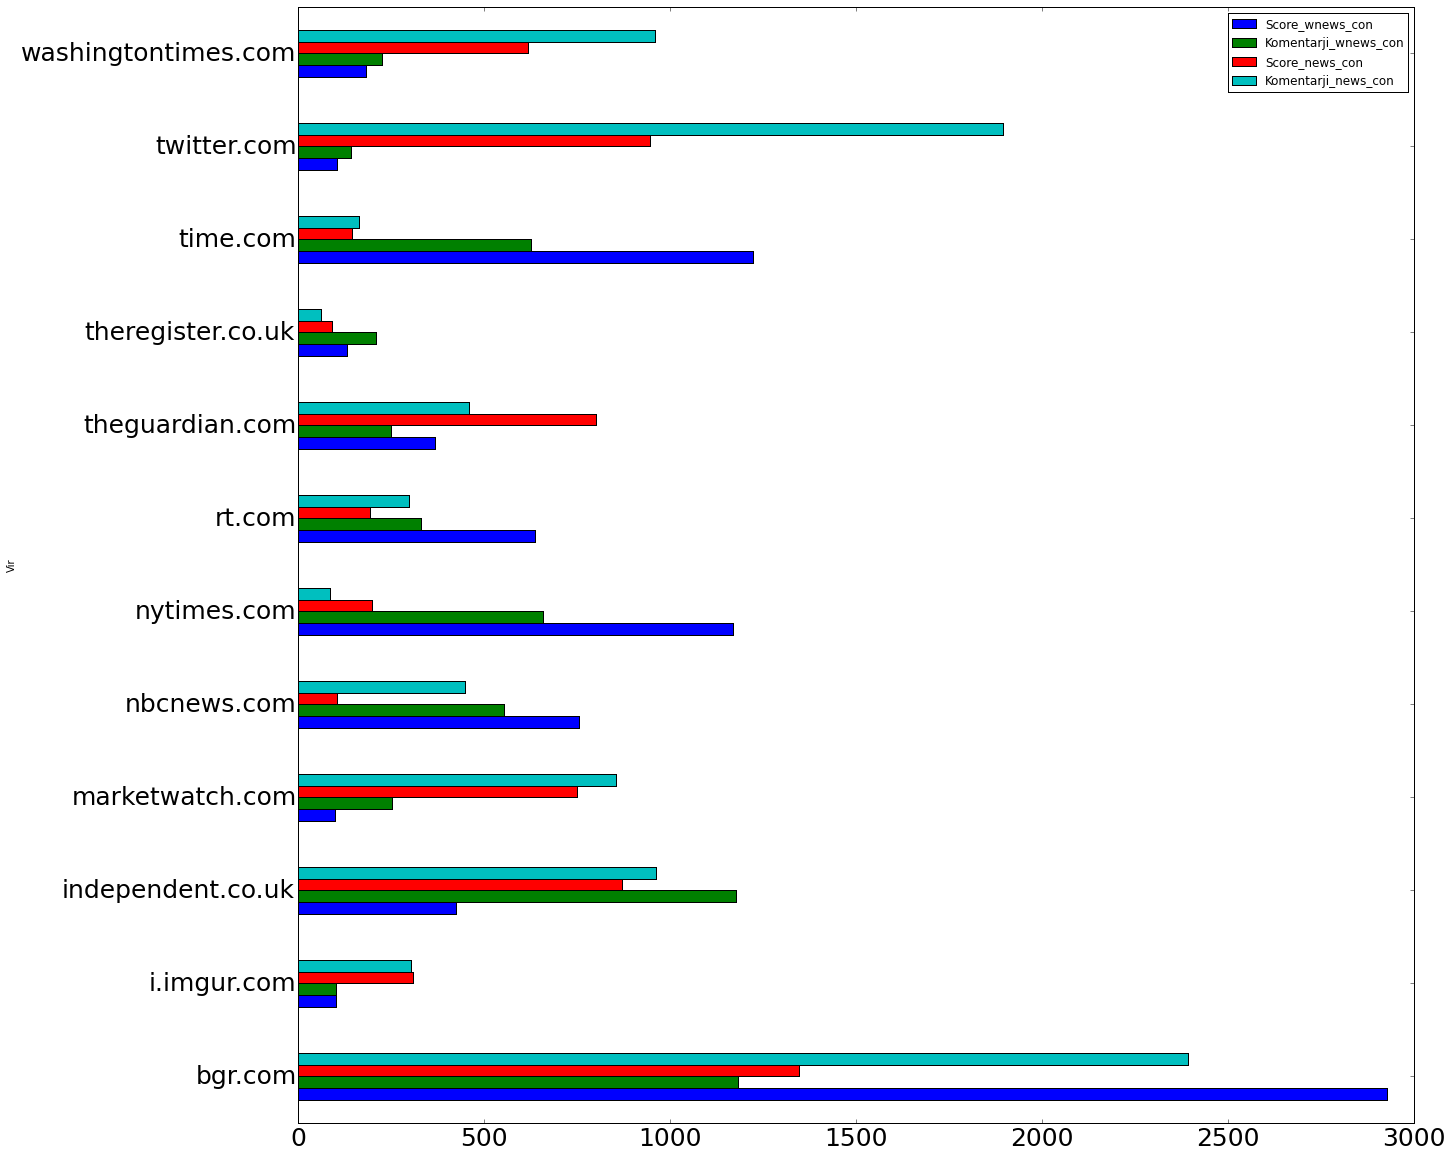

In [96]:
kontraverznoV_10.plot(x='Vir',kind='barh',stacked=False,figsize=(20,20),fontsize=25)

Izstopa vir bgr.com.(Boy Genius Report, stran poroča o tehnologiji in pametnih napravah.) Izkaže se, da ima po eno novico v vsaki kategoriji. Obe novici sta tudi zelo dobro ocenjeni, zato ima v povprečju višje ocene od ostalih. 

In [71]:
news_con[news_con['Vir'] =='bgr.com']

,Naslov,Score,Komentarji,Vir
475,The FCC is now pretending to back down from its controversial net neutrality plan,2925,1183,bgr.com


In [72]:
wnews_con[wnews_con['Vir'] =='bgr.com']

,Naslov,Score,Komentarji,Vir
15,"NSA can turn on your iPhone’s camera, mic without you knowing",1345,2391,bgr.com


In [73]:
#tukaj je več virov, zaostrimo kriterij
najboljseV_10=najboljseV[((najboljseV['Score_wnews_top']>5000) & (najboljseV['Score_news_top']>5000)& (najboljseV['Komentarji_news_top']>3000)& (najboljseV['Komentarji_wnews_top']>3000))]
najboljseV_10

,Vir,Score_wnews_top,Komentarji_wnews_top,Score_news_top,Komentarji_news_top
1,abcnews.go.com,5677.428571,3068.714286,5865.400000,3398.200000
4,bbc.co.uk,5651.333333,7501.000000,6685.000000,4225.391304
5,bbc.com,6025.600000,3192.400000,6461.321429,3291.821429
19,finance.yahoo.com,5664.500000,5418.500000,6183.333333,4284.000000
22,guardian.co.uk,5595.000000,4404.000000,8866.000000,6151.000000
27,mashable.com,5724.000000,3650.000000,7125.000000,4180.000000
31,nbcnews.com,5620.937500,3399.125000,6374.000000,4043.000000
40,nytimes.com,5967.400000,3907.466667,6124.066667,3415.400000
46,thedailybeast.com,5670.500000,5280.000000,6562.333333,3725.333333


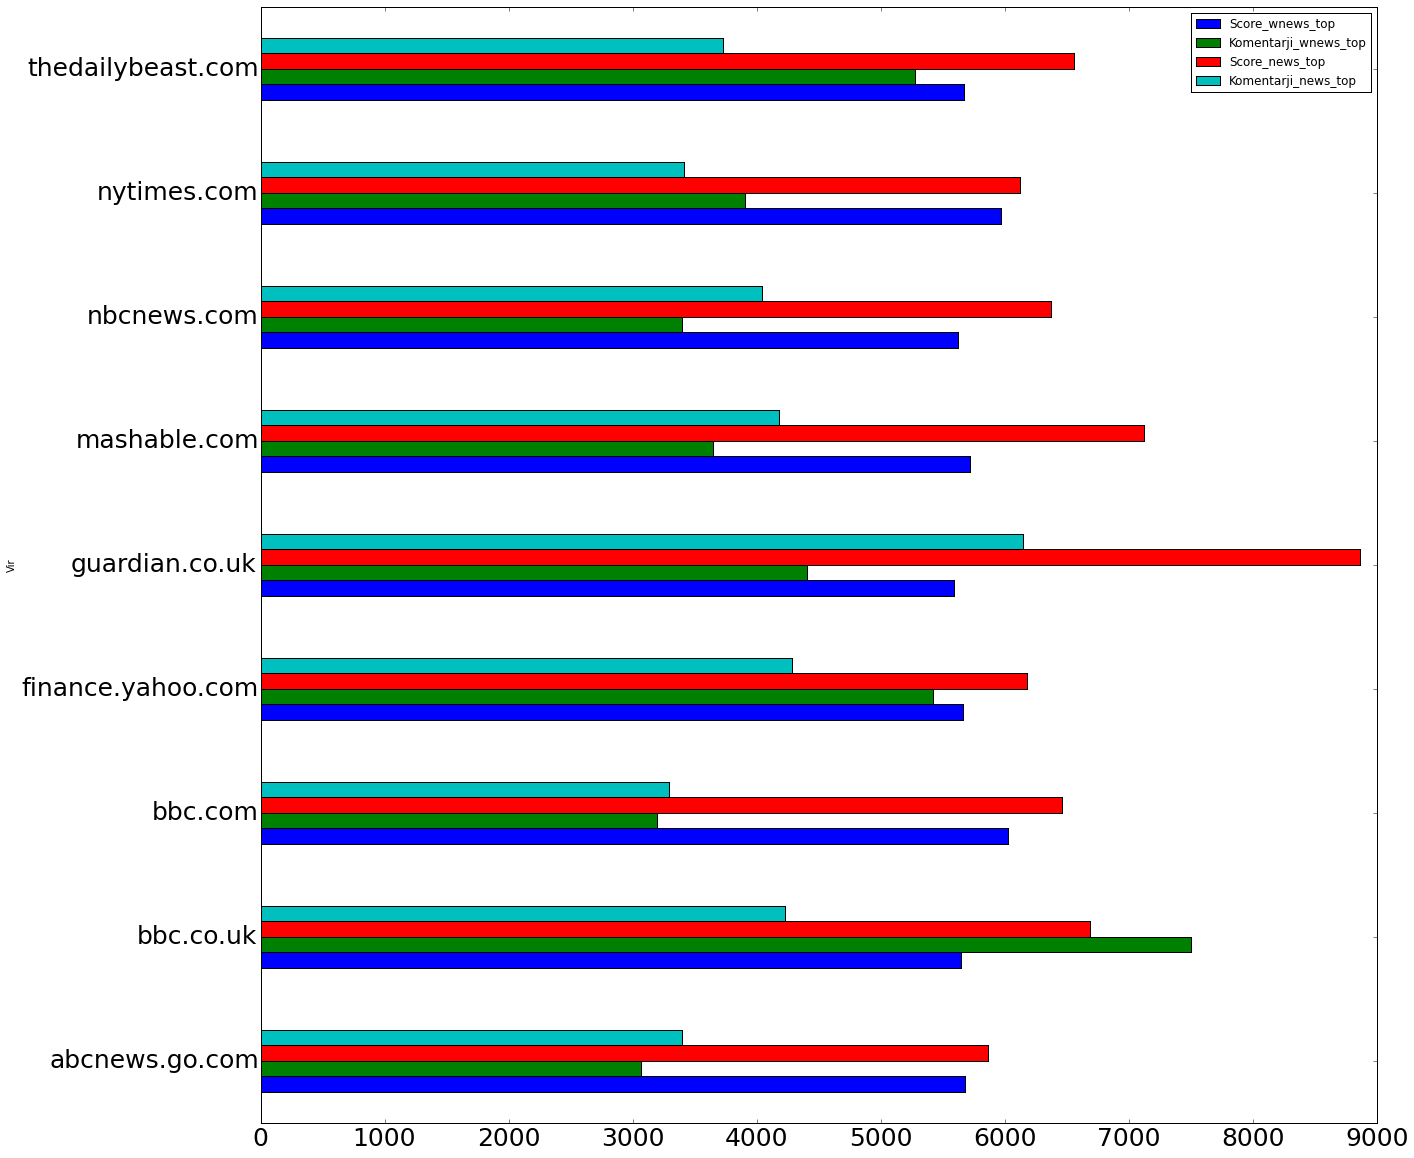

In [100]:
najboljseV_10.plot(x='Vir',kind='barh',stacked=False,legend=True,figsize=(20,20),fontsize=25)

In [75]:
###Pregled 5 najbolj komentiranih in  najbolje ocenjenih novic posameznih kategorij

In [76]:
news_con[(news_con['Score']>3000)&(news_con['Komentarji']>3000)].sort_values(by='Score',ascending=False)

,Naslov,Score,Komentarji,Vir
338,Supreme Court legalizes gay marriage,5170,17086,washingtonpost.com
353,"[CNN Money] Ellen Pao resignation petition reaches 150,000 signatures",4604,4511,money.cnn.com
467,US Marshals arresting people for not paying their federal student loans,4313,5955,fox26houston.com
377,Danish teen fought off her attacker - now she'll face fine. A 17-year-old girl who was physically and sexually attacked in Sønderborg will herself face charges for using pepper spray to fend off her assailant.,4138,10511,thelocal.dk
156,Ahmed Mohamed demands $15m compensation and written apology for homemade clock arrest,3711,10919,independent.co.uk
448,"50,000 people sign petition to stop Kanye West from playing Pan Am Games closing ceremony",3569,3210,nme.com
225,"The family of 24-year-old Jessica Ghawi, a victim in the 2012 movie theater shooting in Aurora, Colorado, is faced with more than $200,000 in legal costs after a federal judge ordered them to pay attorney’s fees for four ammunition dealers the family attempted to sue.",3307,4782,nbcbayarea.com
240,"The Powerball winning numbers are in. The numbers are: 8, 27, 34, 4, 19; The Powerball is: 10",3306,4227,nj.com


In [77]:
wnews_con[(wnews_con['Score']>2300)&(wnews_con['Komentarji']>2300)].sort_values(by='Score',ascending=False)

,Naslov,Score,Komentarji,Vir
380,"Mercedes-Benz, Honda, Mazda and Mitsubishi have been found to be part of the diesel emission scandal.",4081,2417,theguardian.com
125,Microsoft co-founder's yacht tears up protected coral reef in Cayman Islands. Paul Allen’s 330ft vessel destroys 80% of reef in protected zone,3610,2398,theguardian.com
192,Mobs of 'hundreds' of masked men rampage through Stockholm central station beating up refugee children,3339,6268,dailymail.co.uk
224,"One in three Germans say capitalism to blame for poverty, hunger | The survey found that more than 60 percent of Germans believe there is no genuine democracy in their country because industry has too much political influence and that the voice of the voters plays only a subordinate role.",2925,2453,reuters.com
40,Forty percent of Germans want Merkel to resign over refugee policy,2535,3187,reuters.com
94,Germany 1 - 0 Argentina. Germany win the 2014 FIFA World Cup!,2461,3934,bbc.com
326,"62% of British public says Israel committing war crimes, as polls show sympathy for Palestinians",2450,2918,middleeastmonitor.com
454,"Taxing the rich is good for the economy, IMF says - Business",2412,4897,cbc.ca
438,"Denmark may soon be the first country in the world to issue a ban on non-therapeutic circumcision of boys. Calls it ""Genital Mutilation"". Meanwhile, Israel tries hard to block changes that are broadly perceived in Europe as a clear step forward in children's human rights.",2410,10659,cphpost.dk
235,UK: Man jailed for 33 months for pirating ‘Fast &amp; Furious’,2396,3245,rt.com


In [78]:
news_top[(news_top['Score']>6500)&(news_top['Komentarji']>6500)].sort_values(by='Score',ascending=False)

,Naslov,Score,Komentarji,Vir
31,"FCC approves net neutrality rules, reclassifies broadband as a utility",7372,7223,engadget.com
34,Senior Associate Justice Antonin Scalia found dead at West Texas ranch,7292,13895,mysanantonio.com
53,9-Year-Old Shot Dead in Ferguson While Sitting in Bed Doing Her Homework,7042,8671,people.com
75,Reporter &amp; Crew shot on live tv. WDBJ7. Video in comments.,6780,23868,wdbj7.com


In [79]:
wnews_top[(wnews_top['Score']>6500)&(wnews_top['Komentarji']>6500)].sort_values(by='Score',ascending=False)

,Naslov,Score,Komentarji,Vir
10,'Shootings' reported in central Paris: Reports of shooting and casualties in central Paris,9855,28667,bbc.co.uk
31,"The United States will normalize diplomatic relations with Cuba, open embassy in Havana",8191,7306,thedailybeast.com
47,"Reports of sexual assaults on women across European cities, including Cologne, Hamburg, Zürich, Salzburg, Helsinki during NYE festivities",7834,15149,self.worldnews
71,China declares war on ISIS after terrorists 'execute Chinese hostage',7429,7043,mirror.co.uk
76,"Vaping is 95% safer than smoking and could lead to the demise of the traditional cigarette, Public Health England (PHE) has said in the first official recognition that e-cigarettes are less damaging to health than smoking tobacco.",7360,6822,theguardian.com
123,A group of US Marines foiled a potential terror attack on a French train,6910,6587,uk.businessinsider.com
151,Canadians elect Liberal majority. Ending Stephen Harpers 9 year rule.,6694,11058,cbc.ca
178,Bill aiming to ban child marriages shot down in Pakistan as ‘anti-Islamic’ and ‘blasphemous’.,6533,6579,tribune.com.pk
